In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv("Travel.csv")

In [76]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

# 1. What is the distribution of customerages, and how does age relate to product purchase

In [78]:
df.loc[:,"ProdTaken" : "Age"].head()  # we have null values in age , so let's impute null values by mean of the ages

,ProdTaken,Age
0,1,41.0
1,0,49.0
2,1,37.0
3,0,33.0
4,0,NaN


In [79]:
df['Age'].isnull().sum()   # So we have 226 null values

226

In [80]:
# Filling null values
df.fillna(value = df["Age"].mean(), inplace = True)

In [147]:
# Dividing age-group
bins = list(range(18, 62, 5))
labels = ['18-22 years', '23-27 years', '28-32 years', '33-37 years', '38-42 years', '43-47 years', '48-52 years', '53-57 years']


df["ageGrp"] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [112]:
ageBins = range(18, 62, 5)

# Use cut method to categorize age into bins
df['ageGrp'] = pd.cut(df['Age'], bins=ageBins)

# Group by age bins and calculate the sum of 'ProdTaken'
prod_taken_by_age = df.groupby('ageGrp')['ProdTaken'].sum().reset_index()

In [135]:
df1 = df.groupby("ageGrp")["ProdTaken"].sum()

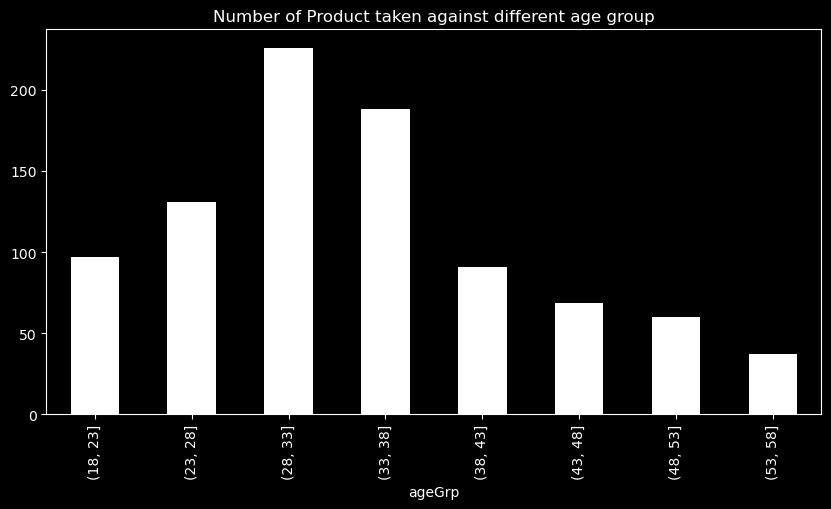

In [140]:
plt.style.use("dark_background")
plt.figure(figsize = (10, 5))
df1.plot(kind='bar',color="white")
plt.title("Number of Product taken against different age group")
plt.show()

In [124]:
df1

ageGrp
(18, 23]     97
(23, 28]    131
(28, 33]    226
(33, 38]    188
(38, 43]     91
(43, 48]     69
(48, 53]     60
(53, 58]     37
Name: ProdTaken, dtype: int64

Ans : From visual data and from data frame name df1, we can see that , the age group between 28 - 33 are purchasing more product.
So we can conclude that middle aged people have more purchasing power. As age is increasing we can witness the decrease in product purchase. 
If we see the graph carefully than we can see the distribution approximate follows the normal or Gaussian distribution.

2. 